<a href="https://colab.research.google.com/github/Akhil2k3/theme-park-ml-analysis/blob/main/Seminar_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm


In [ ]:
for dirname, _, filenames in os.walk('/data/input'):
    for filename in filenames:

        print(os.path.join(dirname, filename))

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000
df1 = pd.read_csv(r"df_test.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'df_test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 102 columns


In [ ]:
df1.head(5)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,atom_0_x,atom_0_y,atom_0_z,atom_1,...,molecule_type_dist_mean_diff,molecule_type_dist_mean_div,molecule_type_dist_max,molecule_type_dist_min,molecule_type_dist_std,molecule_type_dist_std_diff,p_dso,p_pso,p_sd,p_fc
0,4658147,dsgdb9nsd_000004,2,0,2,0,-1.662,0.0,1.0,0,...,0.0,1.0,2.2620,2.2620,0.0,-2.2620,-0.574589,1.450487,0.201719,8.040916
1,4658148,dsgdb9nsd_000004,2,1,0,0,-1.662,0.0,1.0,0,...,0.0,1.0,1.0625,1.0625,0.0,-1.0625,0.431451,-0.626401,0.880630,192.224935
2,4658149,dsgdb9nsd_000004,2,3,6,0,-1.662,0.0,1.0,1,...,0.0,1.0,3.3240,3.3240,NaN,NaN,-3.189398,2.419860,-0.079664,5.391066
3,4658150,dsgdb9nsd_000004,3,0,0,0,1.662,0.0,1.0,0,...,0.0,1.0,1.0625,1.0625,0.0,-1.0625,0.412322,-0.540142,0.922139,189.198111
4,4658151,dsgdb9nsd_000004,3,1,2,0,1.662,0.0,1.0,0,...,0.0,1.0,2.2620,2.2620,0.0,-2.2620,-0.570031,1.295945,0.201144,7.569179


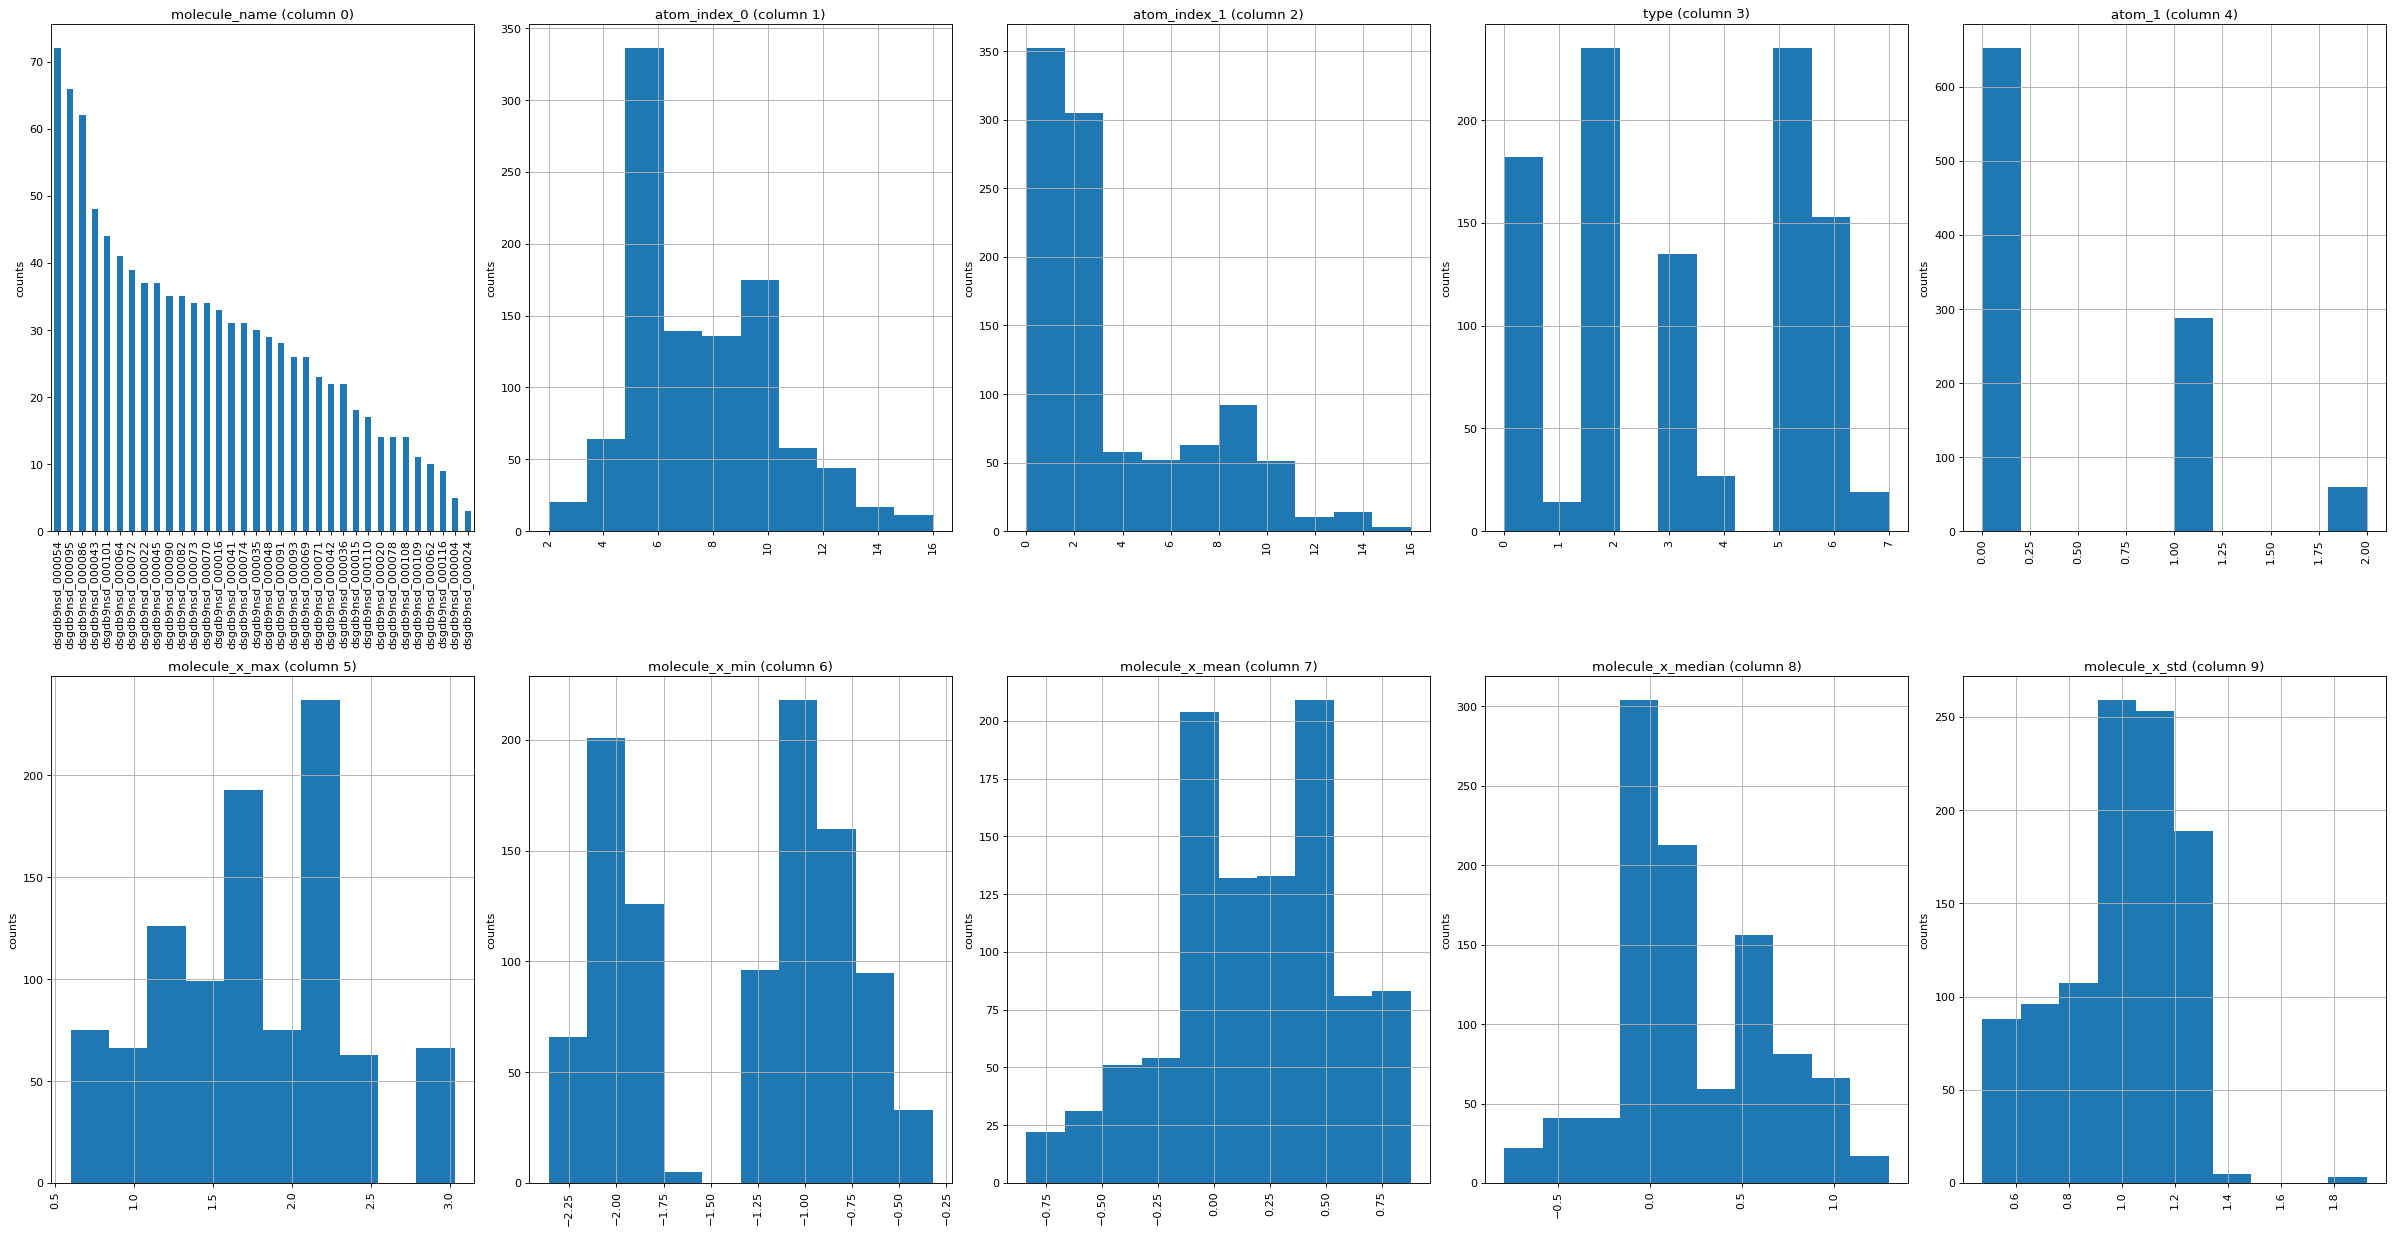

In [ ]:
plotPerColumnDistribution(df1,10,5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


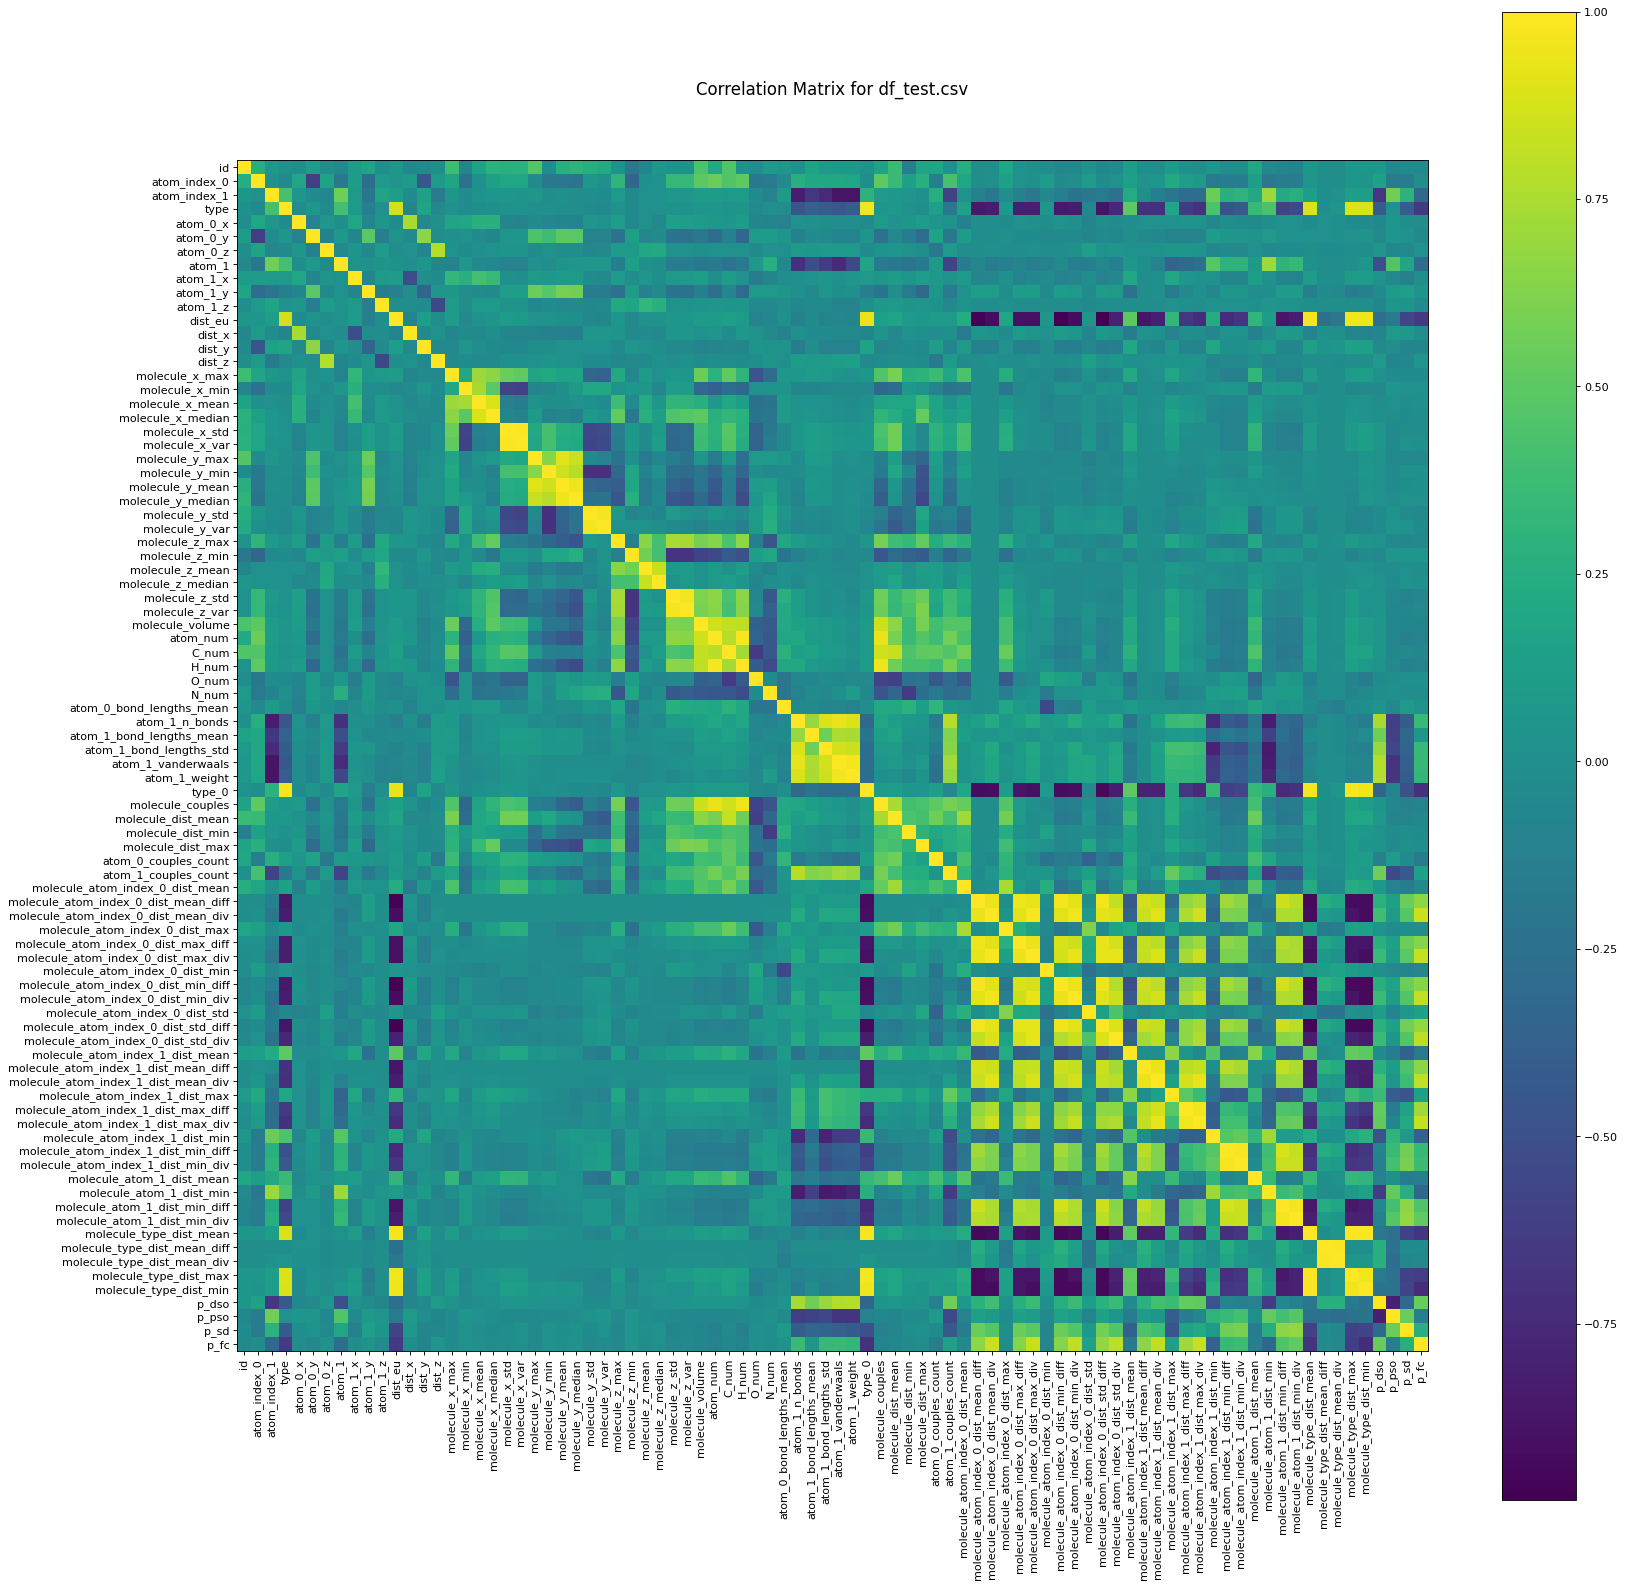

In [ ]:
plotCorrelationMatrix(df1, 24)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


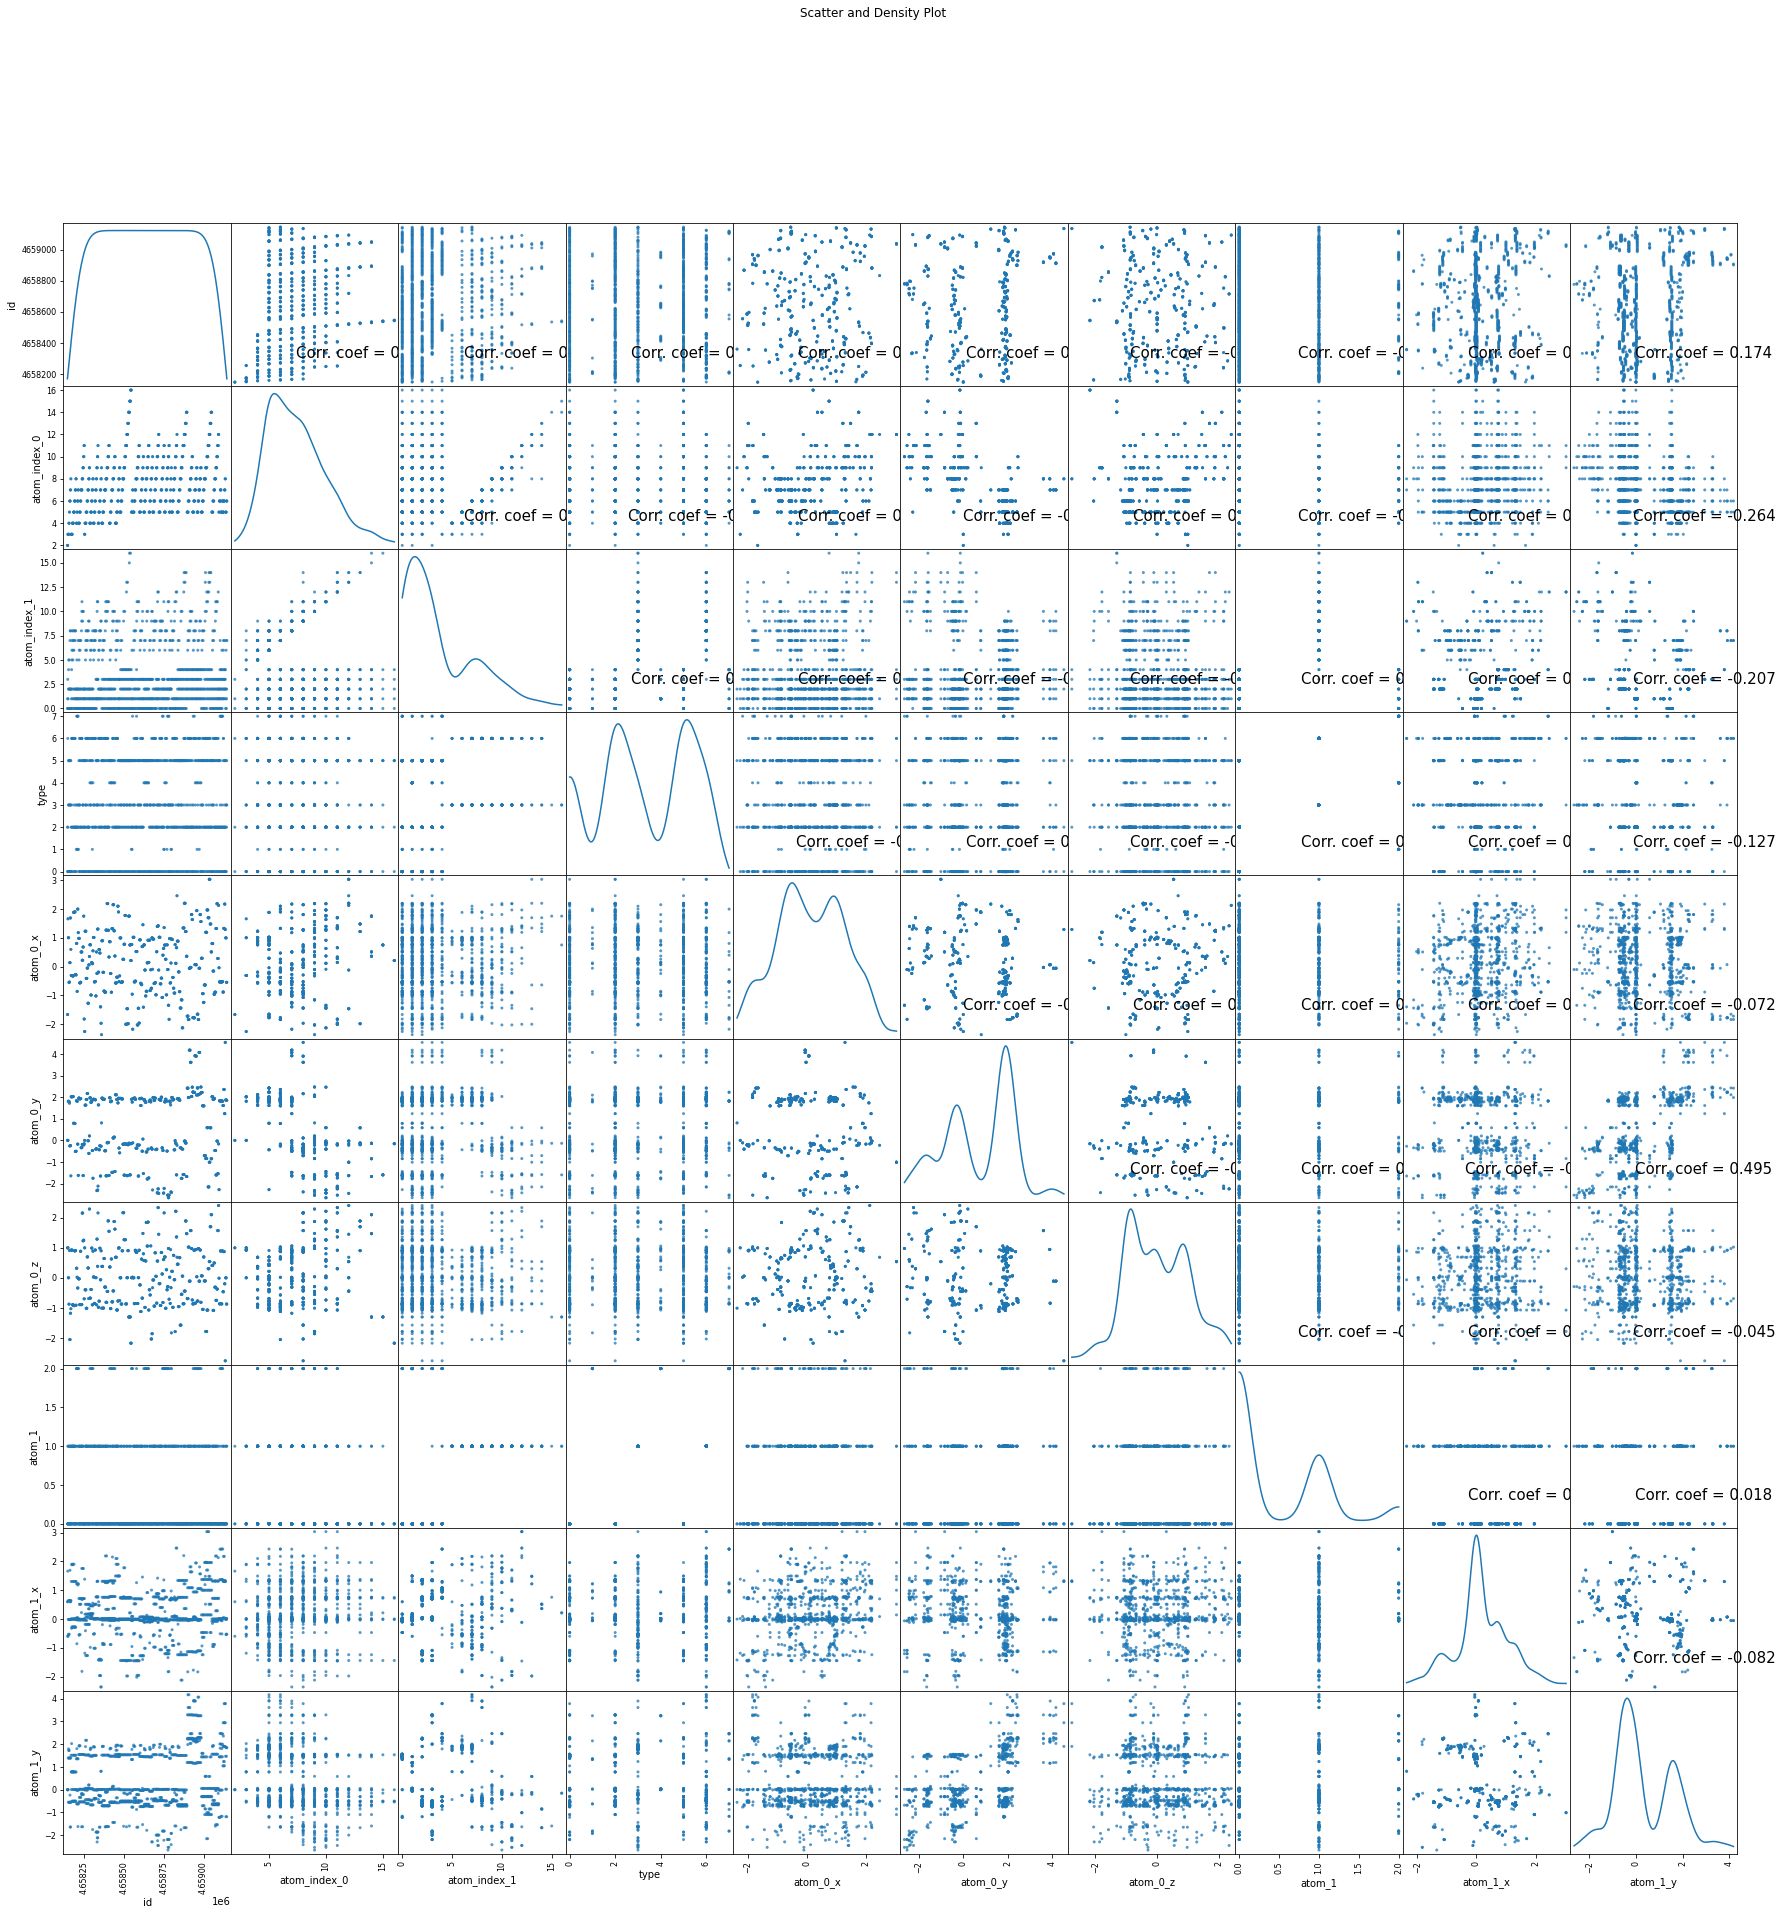

In [ ]:
plotScatterMatrix(df1, 30, 15)


In [ ]:
df1.columns


Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type', 'atom_0',
       'atom_0_x', 'atom_0_y', 'atom_0_z', 'atom_1',
       ...
       'molecule_type_dist_mean_diff', 'molecule_type_dist_mean_div',
       'molecule_type_dist_max', 'molecule_type_dist_min',
       'molecule_type_dist_std', 'molecule_type_dist_std_diff', 'p_dso',
       'p_pso', 'p_sd', 'p_fc'],
      dtype='object', length=102)

In [ ]:
cols = [6,7,8,10,11,12]

features = df1[df1.columns[cols]]


type(features)

pandas.core.frame.DataFrame

In [ ]:
type_of_atom = df1[df1.columns[4]]
type_of_atom

dd_linear_model = sm.OLS(type_of_atom, features)
dd_result = dd_linear_model.fit()
dd_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   type   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              41.64
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                    2.05e-45
Time:                        05:28:57   Log-Likelihood:                         -2658.0
No. Observations:                1000   AIC:                                      5328.
Df Residuals:                     994   BIC:                                      5357.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
atom_0_x       0.1772      0.098      1.802      0.072      -0.016       0.370
atom_0_y       0.8464      0.076     11.131      0.000       0.697       0.996
atom_0_z       0.0588      0.111      0.531      0.596      -0.158       0.276
atom_1_x       0.7843      0.127      6.184      0.000       0.535       1.033
atom_1_y      -0.1077      0.099     -1.092      0.275      -0.301       0.086
atom_1_z       0.8255      0.142      5.821      0.000       0.547       1.104
==============================================================================
Omnibus:                       25.373   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.290
Skew:                           0.105   Prob(JB):                     0.000789
Kurtosis:                       2.453   Cond. No.                         2.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
type(dd_linear_model.fit())

print(str(dd_result.summary()))



                                 OLS Regression Results                                
Dep. Variable:                   type   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              41.64
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                    2.05e-45
Time:                        05:28:57   Log-Likelihood:                         -2658.0
No. Observations:                1000   AIC:                                      5328.
Df Residuals:                     994   BIC:                                      5357.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
dd_result.rsquared
dd_result.conf_int(alpha = 0.05, cols = None)


,0,1
atom_0_x,-0.015753,0.370088
atom_0_y,0.697155,0.995566
atom_0_z,-0.158491,0.276030
atom_1_x,0.535389,1.033153
atom_1_y,-0.301370,0.085936
atom_1_z,0.547234,1.103851


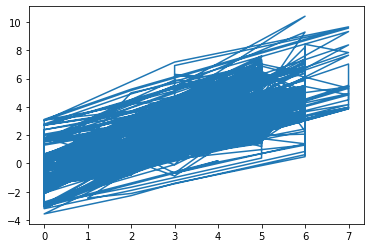

In [ ]:
dd_result.ess.sum() + dd_result.resid.sum()

plt.plot(df1.type, dd_result.resid)
plt.xlabel = "Actual Price",



In [ ]:
now adding more columns

In [ ]:
cols = [6,7,8,10,11,12,17,18,23,24,29,30]

features = df1[df1.columns[cols]]


type(features)

pandas.core.frame.DataFrame

In [ ]:
type_of_atom = df1[df1.columns[4]]
type_of_atom

dd_linear_model = sm.OLS(type_of_atom, features)
dd_result = dd_linear_model.fit()
dd_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   type   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              197.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                   3.73e-252
Time:                        05:49:54   Log-Likelihood:                         -2159.3
No. Observations:                1000   AIC:                                      4343.
Df Residuals:                     988   BIC:                                      4402.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
atom_0_x          -0.0888      0.061     -1.447      0.148      -0.209       0.032
atom_0_y           0.2244      0.051      4.379      0.000       0.124       0.325
atom_0_z          -0.0730      0.068     -1.070      0.285      -0.207       0.061
atom_1_x           0.1836      0.086      2.144      0.032       0.016       0.352
atom_1_y          -0.3938      0.068     -5.760      0.000      -0.528      -0.260
atom_1_z           0.0211      0.093      0.228      0.820      -0.161       0.203
molecule_x_max     0.3136      0.118      2.654      0.008       0.082       0.545
molecule_x_min    -0.3835      0.117     -3.281      0.001      -0.613      -0.154
molecule_y_max     0.5184      0.107      4.823      0.000       0.307       0.729
molecule_y_min    -0.3023      0.100     -3.037      0.002      -0.498      -0.107
molecule_z_max     0.2015      0.127      1.585      0.113      -0.048       0.451
molecule_z_min    -0.0955      0.120     -0.797      0.426      -0.331       0.140
==============================================================================
Omnibus:                      266.249   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.955
Skew:                          -0.069   Prob(JB):                     1.05e-10
Kurtosis:                       1.959   Cond. No.                         9.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
type(dd_linear_model.fit())

print(str(dd_result.summary()))


                                 OLS Regression Results                                
Dep. Variable:                   type   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              197.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                   3.73e-252
Time:                        05:50:48   Log-Likelihood:                         -2159.3
No. Observations:                1000   AIC:                                      4343.
Df Residuals:                     988   BIC:                                      4402.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
dd_result.rsquared
dd_result.conf_int(alpha = 0.05, cols = None)

,0,1
atom_0_x,-0.209300,0.031603
atom_0_y,0.123863,0.324991
atom_0_z,-0.207026,0.060938
atom_1_x,0.015551,0.351663
atom_1_y,-0.527931,-0.259615
atom_1_z,-0.160732,0.202983
molecule_x_max,0.081712,0.545457
molecule_x_min,-0.612830,-0.154142
molecule_y_max,0.307492,0.729293
molecule_y_min,-0.497574,-0.106983


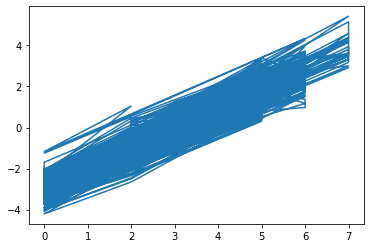

In [ ]:
dd_result.ess.sum() + dd_result.resid.sum()

plt.plot(df1.type, dd_result.resid)
plt.xlabel = "Actual Price",